In [2]:
import numpy as np

## Reading contents of file

- Open the file in read-mode as fp
- read the file as a list of lines using readlines()

In [1]:
with open('methane.xyz') as fp:
    fc = fp.readlines()

fc

['5\n',
 '\n',
 'C         -3.24842        1.20534        0.00000\n',
 'H         -2.17842        1.20534        0.00000\n',
 'H         -3.60509        0.66001       -0.84871\n',
 'H         -3.60509        2.21301       -0.04792\n',
 'H         -3.60509        0.74301        0.89662\n']

## The .xyz file format, 
1.  the first line is the total number of atoms
2.  the second line is for comments
3.  from third line, the coordinates

Below, atom types (symbols) are stored separately and 
the coordinates are stored separately.

In [3]:
atoms = []
coordinates = []

for line in fc[2:]:
    symbol, x, y, z = line.split()
    print(line.split())
    atoms.append(symbol)
    coordinates.append([float(x), float(y), float(z)])

print()
print(atoms, coordinates)

['C', '-3.24842', '1.20534', '0.00000']
['H', '-2.17842', '1.20534', '0.00000']
['H', '-3.60509', '0.66001', '-0.84871']
['H', '-3.60509', '2.21301', '-0.04792']
['H', '-3.60509', '0.74301', '0.89662']

['C', 'H', 'H', 'H', 'H'] [[-3.24842, 1.20534, 0.0], [-2.17842, 1.20534, 0.0], [-3.60509, 0.66001, -0.84871], [-3.60509, 2.21301, -0.04792], [-3.60509, 0.74301, 0.89662]]


Find the distance
$$ r_{12} = \sqrt{(x_1 - X_2)^2 + (z_1 - z_2)^2 + (z_1 - z_2)^2} $$

In [5]:
import numpy as np
r12 = np.sqrt((coordinates[0][0]-coordinates[1][0])**2 + \
              (coordinates[0][1]-coordinates[1][1])**2 + \
              (coordinates[0][2]-coordinates[1][2])**2)

r13 = np.sqrt((coordinates[0][0]-coordinates[2][0])**2 + \
              (coordinates[0][1]-coordinates[2][1])**2 + \
              (coordinates[0][2]-coordinates[2][2])**2)

print('distance ', atoms[0], '-', atoms[1], '= ', r12)
print('distance ', atoms[0], '-', atoms[2], '= ', r13)

distance  C - H =  1.0699999999999998
distance  C - H =  1.0700032532193537


We can convert the coordinates into mumpy array do many calculations more easily

In [138]:
coord = np.array(coordinates)
coords

array([[-0.14565,  1.10744,  0.     ],
       [-0.21425,  0.13369, -0.     ],
       [ 1.21425, -0.13369, -0.     ],
       [ 1.14565, -1.10744,  0.     ]])

For example, we can calculate the norm using np.linalg.norm.

In [139]:
np.linalg.norm(coord[0]-coord[1])

1.0699999999999998

We calculate angle using the following:
$$ \cos\theta = \frac{\overrightarrow{v}_{12} \cdot \overrightarrow{v}_{13}}{\overrightarrow{r}_{12} \overrightarrow{r}_{12}} $$ 

In [112]:
v12 = coord[0]-coord[1] #vector 1-2
v13 = coord[0]-coord[2]
cos_theta = np.dot(v12, v13)/(r12*r13)

theta_radians = np.arccos(cos_theta)
theta_degrees = np.degrees(theta_radians)
print(theta_degrees)

109.47134836342906


In [141]:
import numpy as np

def read_xyz(input_file):
    '''Read the xyz file and extract atoms-list and coordinates'''
    with open(input_file) as fp:
        fc = fp.readlines()

    atoms = []
    coordinates = []

    for line in fc[2:]:
        symbol, x, y, z = line.split()
        atoms.append(symbol)
        coordinates.append([float(x), float(y), float(z)])

    return atoms, np.array(coordinates)

def calculate_distance(a, b):
    '''Calculate distance between two points a(x1, y1, z1) and b(x2, y2, z2)'''
    return np.linalg.norm(a - b)

def calculate_angle(a, b, c):
    '''Calculate angle a-b-c a(x1, y1, z1), b(x2, y2, z2), and c(x3, y3, z3)'''
    v12 = b - a
    v13 = b - c
    r12 = calculate_distance(a, b)
    r13 = calculate_distance(c, b)
    cos_theta = np.dot(v12, v13)/(r12*r13)

    theta_radians = np.arccos(cos_theta)
    return theta_radians

def calculate_torsion(a, b, c, d):
    '''Calculate torsion angle a-b-c-d a(x1, y1, z1), b(x2, y2, z2), 
       c(x3, y3, z3), and d(x4, y4, z4)'''
    v_ba = b - a
    v_bc = b - c
    v_cb = c - b
    v_cd = c - d
    
    r_ba = np.linalg.norm(v_ba)
    r_bc = np.linalg.norm(v_bc)
    r_cb = np.linalg.norm(v_cb)
    r_cd = np.linalg.norm(v_cd)
    print('distrances =', r_ba, r_bc, r_cb, r_cd)

    u_ba = v_ba/r_ba
    u_bc = v_bc/r_bc
    u_cb = v_cb/r_cb
    u_cd = v_cd/r_cd
    
    cos_abc = np.dot(u_ba, u_bc)
    cos_bcd = np.dot(u_cb, u_cd)

    sin_abc = np.sqrt(1-cos_abc**2)
    sin_bcd = np.sqrt(1-cos_bcd**2)
    
    print('angles = ', np.degrees(np.arccos(cos_abc)), np.degrees(np.arccos(cos_bcd)))

    n_abc = np.cross(v_ba, v_bc)
    n_bcd = np.cross(v_cb, v_cd)
    cosf = np.dot(n_bcd, n_abc)/(np.linalg.norm(n_abc)*np.linalg.norm(n_bcd))
    t_abcd = np.arccos(cosf)
    return t_abcd

atoms, coords = read_xyz('h2o2.xyz')
i = coords[0]
j = coords[1]
k = coords[2]
l = coords[3]

totsion_abcd = np.degrees(calculate_torsion(i, j,  k, l))
print('torsion =', totsion_abcd)

distrances = 0.976163419976389 1.4533080590157066 1.4533080590157066 0.976163419976389
angles =  96.57189610373983 96.57189610373983
torsion = 180.0


# Visualising Molecular Mechanics Energy Functions

## Bond stretching
quadratic functions such as $$ E = k_{str}(r-r_0)^2 $$

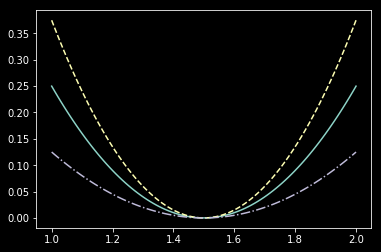

In [123]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

x = np.linspace(1, 2, 100)
x0 = 1.5
k = 1.0
y = k*(x-x0)**2
plt.plot(x, y)

k = 1.5
y = k*(x-x0)**2
plt.plot(x, y, '--')

k = 0.5
y = k*(x-x0)**2
plt.plot(x, y, '-.')

In [8]:
xs = np.linspace(1, 2, 100)
xs

array([1.        , 1.01010101, 1.02020202, 1.03030303, 1.04040404,
       1.05050505, 1.06060606, 1.07070707, 1.08080808, 1.09090909,
       1.1010101 , 1.11111111, 1.12121212, 1.13131313, 1.14141414,
       1.15151515, 1.16161616, 1.17171717, 1.18181818, 1.19191919,
       1.2020202 , 1.21212121, 1.22222222, 1.23232323, 1.24242424,
       1.25252525, 1.26262626, 1.27272727, 1.28282828, 1.29292929,
       1.3030303 , 1.31313131, 1.32323232, 1.33333333, 1.34343434,
       1.35353535, 1.36363636, 1.37373737, 1.38383838, 1.39393939,
       1.4040404 , 1.41414141, 1.42424242, 1.43434343, 1.44444444,
       1.45454545, 1.46464646, 1.47474747, 1.48484848, 1.49494949,
       1.50505051, 1.51515152, 1.52525253, 1.53535354, 1.54545455,
       1.55555556, 1.56565657, 1.57575758, 1.58585859, 1.5959596 ,
       1.60606061, 1.61616162, 1.62626263, 1.63636364, 1.64646465,
       1.65656566, 1.66666667, 1.67676768, 1.68686869, 1.6969697 ,
       1.70707071, 1.71717172, 1.72727273, 1.73737374, 1.74747

## Morse potential
$$ D*(1-\exp(-a(x-x0)))^2) $$

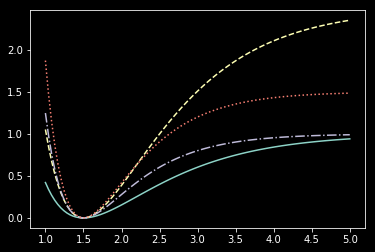

In [128]:
x = np.linspace(1, 5, 100)
D = 1.0
a = 1.0
plt.plot(x, D*(1-np.exp(-a*(x-x0)))**2)

D = 2.5
a = 1.0
plt.plot(x, D*(1-np.exp(-a*(x-x0)))**2, '--')

D = 1.0
a = 1.5
plt.plot(x, D*(1-np.exp(-a*(x-x0)))**2, '-.')

D = 1.5
a = 1.5
plt.plot(x, D*(1-np.exp(-a*(x-x0)))**2, ':')

## Torsion
$$ E = k_{0}[1+k_r\cos(r\theta)] $$

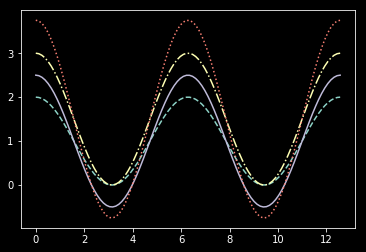

In [142]:
xt = np.linspace(0, 4*np.pi, 100)
k0 = 1.0
kr = 1.0
plt.plot(xt, 1 + np.cos(xt), '--')

k0 = 1.5
kr = 1.0
plt.plot(xt, k0*(1 + kr*np.cos(xt)), '-.')

k0 = 1.0
kr = 1.5
plt.plot(xt, k0*(1 + kr*np.cos(xt)))


k0 = 1.5
kr = 1.5
plt.plot(xt, k0*(1 + kr*np.cos(xt)), ':', label='1.5-1.5')

## Electrostatic Term

$$ E = \frac{q1 q1}{r} $$

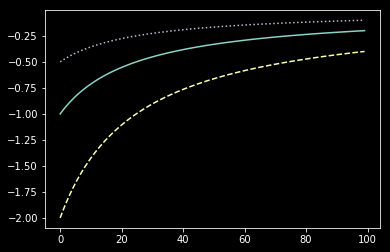

In [61]:
x = np.linspace(1, 5, 100)
q1 = 1
q2 = -1
e = 1.0
plt.plot(q1*q2/(e*x))

q1 = 1
q2 = -2
e = 1
plt.plot(q1*q2/(e*x), '--')

q1 = 1
q2 = -1
e = 2
plt.plot(q1*q2/(e*x), ':')


## Van der Waals term
$$ E = 4\epsilon\left[(\frac{\sigma}{r})^{12}-(\frac{\sigma}{r})^{6}\right] $$

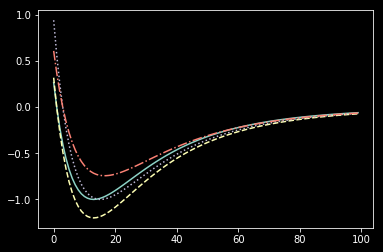

In [64]:
x = np.linspace(0.99, 2, 100)
e = 1
s = 1
plt.plot(4*e*((s/x)**12-(s/x)**6))

e = 1.2
s = 1
plt.plot(4*e*((s/x)**12-(s/x)**6), '--')

e = 1
s = 1.02
plt.plot(4*e*((s/x)**12-(s/x)**6), ':')

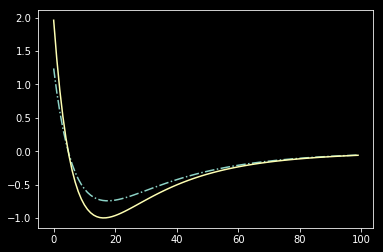

In [67]:
x = np.linspace(0.95, 2, 100)
e = 1
s = 1.0
plt.plot(4*e*((s/x)**10-(s/x)**6), '-.')
plt.plot(4*e*((s/x)**12-(s/x)**6), '-')